# Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
training = pd.read_csv("../input/disease-prediction-using-machine-learning/Training.csv")
training

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


## Droping unnecessary column

In [4]:
training.drop('Unnamed: 133', axis=1, inplace=True)
training.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

### Counts of prognosis in data

In [5]:
len(training['prognosis'].value_counts())

41

There are 41 different prognonsis which means our labels in data. To see what these are:

In [6]:
training['prognosis'].value_counts()

Arthritis                                  120
Chicken pox                                120
Hypertension                               120
Peptic ulcer diseae                        120
Impetigo                                   120
Common Cold                                120
Tuberculosis                               120
Hypoglycemia                               120
Gastroenteritis                            120
Varicose veins                             120
Dimorphic hemmorhoids(piles)               120
Hepatitis B                                120
Hyperthyroidism                            120
Chronic cholestasis                        120
Alcoholic hepatitis                        120
Acne                                       120
Hepatitis E                                120
Drug Reaction                              120
Hepatitis D                                120
Hepatitis C                                120
(vertigo) Paroymsal  Positional Vertigo    120
GERD         

We have the same count of label samples for each prognosis. Now see unique features in other columns:

In [7]:
for column in training.columns[:-1]:
    print("{} ({}) : {}".format(column, len(training[column].unique()), training[column].unique()))

itching (2) : [1 0]
skin_rash (2) : [1 0]
nodal_skin_eruptions (2) : [1 0]
continuous_sneezing (2) : [0 1]
shivering (2) : [0 1]
chills (2) : [0 1]
joint_pain (2) : [0 1]
stomach_pain (2) : [0 1]
acidity (2) : [0 1]
ulcers_on_tongue (2) : [0 1]
muscle_wasting (2) : [0 1]
vomiting (2) : [0 1]
burning_micturition (2) : [0 1]
spotting_ urination (2) : [0 1]
fatigue (2) : [0 1]
weight_gain (2) : [0 1]
anxiety (2) : [0 1]
cold_hands_and_feets (2) : [0 1]
mood_swings (2) : [0 1]
weight_loss (2) : [0 1]
restlessness (2) : [0 1]
lethargy (2) : [0 1]
patches_in_throat (2) : [0 1]
irregular_sugar_level (2) : [0 1]
cough (2) : [0 1]
high_fever (2) : [0 1]
sunken_eyes (2) : [0 1]
breathlessness (2) : [0 1]
sweating (2) : [0 1]
dehydration (2) : [0 1]
indigestion (2) : [0 1]
headache (2) : [0 1]
yellowish_skin (2) : [0 1]
dark_urine (2) : [0 1]
nausea (2) : [0 1]
loss_of_appetite (2) : [0 1]
pain_behind_the_eyes (2) : [0 1]
back_pain (2) : [0 1]
constipation (2) : [0 1]
abdominal_pain (2) : [0 1]
d

In [8]:
testing = pd.read_csv("../input/disease-prediction-using-machine-learning/Testing.csv")
testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [9]:
testing.shape

(42, 133)

In [10]:
len(testing['prognosis'].unique())

41

# Train Test Split

In [11]:
X_train = training.drop('prognosis', axis=1)
y_train = training['prognosis']
y_train = np.array(y_train).reshape(y_train.shape[0], 1)

X_test = testing.drop('prognosis', axis=1)
y_test = testing['prognosis']
y_test = np.array(y_test).reshape(y_test.shape[0], 1)

print("X_train : {} \ny_train : {} \nX_test: {} \ny_test : {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train : (4920, 132) 
y_train : (4920, 1) 
X_test: (42, 132) 
y_test : (42, 1)


# Decision Tree

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [13]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

pred = tree.predict(X_test)
acc = tree.score(X_test, y_test)

print("Acurray on test set: {:.2f}%".format(acc*100))

Acurray on test set: 97.62%


Comparision of predictions for first 10 test data:

In [14]:
np.ravel(y_test[:10])

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma'], dtype=object)

In [15]:
np.ravel(pred[:10])

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma'], dtype=object)

In [16]:
print(classification_report(y_test, pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold       1.00      1.00      1.00         1
                           

## Important Features

In [17]:
fi = pd.DataFrame(tree.feature_importances_*100, X_train.columns, columns=['Importance'])
fi.sort_values(by='Importance',ascending=False, inplace=True)
fi

,Importance
high_fever,4.789671
coma,2.500000
loss_of_smell,2.500000
slurred_speech,2.500000
swollen_extremeties,2.500000
...,...
runny_nose,0.000000
sinus_pressure,0.000000
redness_of_eyes,0.000000
throat_irritation,0.000000


In [18]:
zeros = np.array(fi[fi['Importance'] == 0.000000].index)
zeros

array(['foul_smell_of urine', 'continuous_feel_of_urine',
       'prominent_veins_on_calf', 'palpitations', 'painful_walking',
       'scurring', 'red_sore_around_nose', 'inflammatory_nails',
       'toxic_look_(typhos)', 'depression', 'fluid_overload.1',
       'red_spots_over_body', 'belly_pain', 'stomach_bleeding',
       'loss_of_balance', 'receiving_unsterile_injections',
       'watering_from_eyes', 'polyuria', 'visual_disturbances',
       'skin_peeling', 'silver_like_dusting', 'itching',
       'spinning_movements', 'irregular_sugar_level', 'fluid_overload',
       'acute_liver_failure', 'yellow_urine', 'abdominal_pain',
       'yellowish_skin', 'indigestion', 'dehydration', 'sunken_eyes',
       'cough', 'patches_in_throat', 'swelled_lymph_nodes', 'lethargy',
       'restlessness', 'mood_swings', 'cold_hands_and_feets', 'anxiety',
       'weight_gain', 'muscle_wasting', 'joint_pain', 'shivering',
       'swelling_of_stomach', 'blurred_and_distorted_vision',
       'stiff_neck'

In [19]:
zeros.shape

(69,)

In [20]:
print("Count of Features have 0% importance: {}".format(len(zeros)))

Count of Features have 0% importance: 69


I'm deleting these features having 0% importance for tree to decision and creating new dataframe. I will use new dataframe for a neural network.

# New Dataframe

We had 133 columns and with deleting 69, new dataframe has to consist of 64 columns.

In [21]:
training_new = training.drop(columns=zeros, axis=1)
training_new.shape[1]

64

I'm doing same for test set.

In [22]:
testing_new = testing.drop(columns=zeros, axis=1)
testing_new.shape[1]

64

# Neural Network

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [24]:
X_train_new = training_new.drop('prognosis', axis=1)
y_train_new = training['prognosis']

X_test_new = testing_new.drop('prognosis', axis=1)
y_test_new = testing['prognosis']

In [25]:
print("X_train_new : {} \ny_train_new : {} \nX_test_new: {} \ny_test_new : {}".format(X_train_new.shape, y_train_new.shape, X_test_new.shape, y_test_new.shape))

X_train_new : (4920, 63) 
y_train_new : (4920,) 
X_test_new: (42, 63) 
y_test_new : (42,)


In [26]:
y_train_enc = pd.get_dummies(y_train_new)
y_test_enc = pd.get_dummies(y_test_new)
y_train_enc.head(10)

,(vertigo) Paroymsal Positional Vertigo,AIDS,Acne,Alcoholic hepatitis,Allergy,Arthritis,Bronchial Asthma,Cervical spondylosis,Chicken pox,Chronic cholestasis,...,Osteoarthristis,Paralysis (brain hemorrhage),Peptic ulcer diseae,Pneumonia,Psoriasis,Tuberculosis,Typhoid,Urinary tract infection,Varicose veins,hepatitis A
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
model = Sequential()
model.add(Dense(32, input_dim=X_train_new.shape[1]))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(y_train_enc.shape[1]))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                2048      
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 41)                697       
_________________________________________________________________
activation_2 (Activation)    (None, 41)                0         
Total params: 3,273
Trainable params: 3,273
Non-trainable params: 0
______________________________________________________

In [28]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'], optimizer='adam')

In [29]:
history = model.fit(X_train_new, y_train_enc, batch_size=120, epochs=30, validation_split=0.3)

Epoch 1/30
29/29 [==============================] - 2s 32ms/step - loss: 0.6934 - accuracy: 0.0387 - val_loss: 0.6552 - val_accuracy: 0.0488
Epoch 2/30
29/29 [==============================] - 0s 7ms/step - loss: 0.6348 - accuracy: 0.0383 - val_loss: 0.5282 - val_accuracy: 0.0244
Epoch 3/30
29/29 [==============================] - 0s 5ms/step - loss: 0.4779 - accuracy: 0.0270 - val_loss: 0.2887 - val_accuracy: 0.0244
Epoch 4/30
29/29 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.0225 - val_loss: 0.1570 - val_accuracy: 0.0244
Epoch 5/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1522 - accuracy: 0.0257 - val_loss: 0.1317 - val_accuracy: 0.0244
Epoch 6/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1308 - accuracy: 0.0222 - val_loss: 0.1231 - val_accuracy: 0.0488
Epoch 7/30
29/29 [==============================] - 0s 5ms/step - loss: 0.1228 - accuracy: 0.0471 - val_loss: 0.1174 - val_accuracy: 0.0488
Epoch 8/30
29/29 [=

# Visualization

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

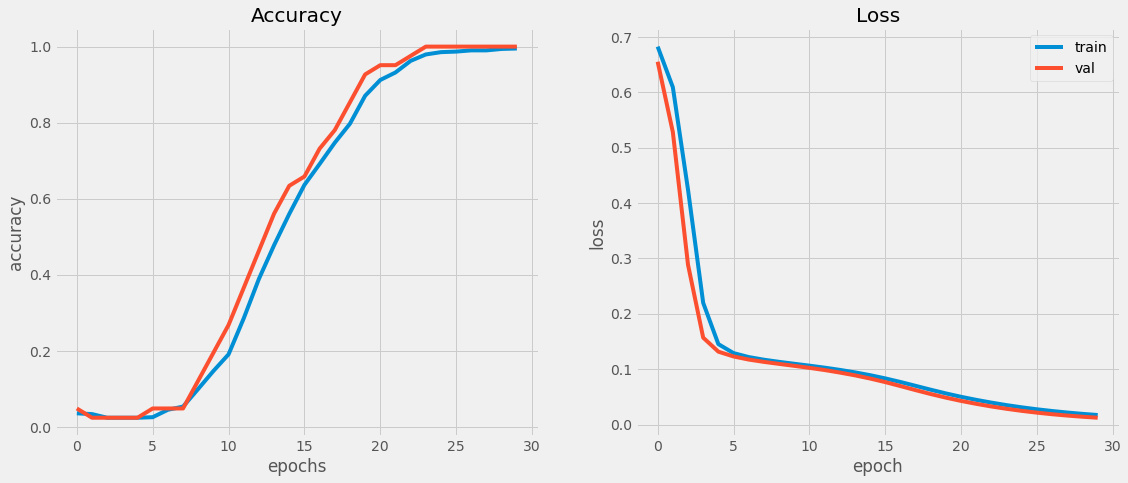

In [41]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epochs')
plt.legend(['train', 'val'], loc='lower right')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

In [50]:
score = model.evaluate(X_test_new, y_test_enc, steps=5, batch_size=1, verbose=1)

print('Loss: ', score[0])
print('Accuracy: ', score[1]*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 1.0000
Loss:  0.01849457621574402
Accuracy:  100.0
